In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mental-Health-Twitter.csv")
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
df.shape

(20000, 11)

In [4]:
df.isnull().sum() # check for missing values


Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [5]:
# keep only the required columns
df = df[['post_text']]
df.head()


,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [6]:
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [7]:
df.shape

(20000, 1)

In [8]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

In [9]:
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [10]:
!pip install textblob
from textblob import TextBlob

In [11]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install -U NLTK


  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.2.5 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.5 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.5 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.2.5 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.5 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.5 which is incompatible.
scipy 1.11.4 requires nu

In [12]:
# tokenize each word
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df.head()

,post_text,tokens
0,it's just over 2 years since i was diagnosed w...,"[it, 's, just, over, 2, years, since, i, was, ..."
1,"it's sunday, i need a break, so i'm planning t...","[it, 's, sunday, i, need, a, break, so, i, 'm,..."
2,awake but tired. i need to sleep but my brain ...,"[awake, but, tired, i, need, to, sleep, but, m..."
3,rt @sewhq: #retro bears make perfect gifts and...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,it’s hard to say whether packing lists are mak...,"[it, ’, s, hard, to, say, whether, packing, li..."


In [14]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [15]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.262500,0.537500
3,1.000000,0.875000
4,-0.045833,0.370833


In [16]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,it's just over 2 years since i was diagnosed w...,"[it, 's, just, over, 2, years, since, i, was, ...",0.100000,1.000000
1,"it's sunday, i need a break, so i'm planning t...","[it, 's, sunday, i, need, a, break, so, i, 'm,...",-0.093750,0.750000
2,awake but tired. i need to sleep but my brain ...,"[awake, but, tired, i, need, to, sleep, but, m...",-0.262500,0.537500
3,rt @sewhq: #retro bears make perfect gifts and...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000
4,it’s hard to say whether packing lists are mak...,"[it, ’, s, hard, to, say, whether, packing, li...",-0.045833,0.370833


In [17]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,it's just over 2 years since i was diagnosed w...,"[it, 's, just, over, 2, years, since, i, was, ...",0.100000
1,"it's sunday, i need a break, so i'm planning t...","[it, 's, sunday, i, need, a, break, so, i, 'm,...",-0.093750
2,awake but tired. i need to sleep but my brain ...,"[awake, but, tired, i, need, to, sleep, but, m...",-0.262500
3,rt @sewhq: #retro bears make perfect gifts and...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000
4,it’s hard to say whether packing lists are mak...,"[it, ’, s, hard, to, say, whether, packing, li...",-0.045833
5,making packing lists is my new hobby... #movin...,"[making, packing, lists, is, my, new, hobby, m...",0.136364


In [18]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,it's just over 2 years since i was diagnosed w...,"[it, 's, just, over, 2, years, since, i, was, ...",0.100000,Positive
1,"it's sunday, i need a break, so i'm planning t...","[it, 's, sunday, i, need, a, break, so, i, 'm,...",-0.093750,Negative
2,awake but tired. i need to sleep but my brain ...,"[awake, but, tired, i, need, to, sleep, but, m...",-0.262500,Negative
3,rt @sewhq: #retro bears make perfect gifts and...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,Positive
4,it’s hard to say whether packing lists are mak...,"[it, ’, s, hard, to, say, whether, packing, li...",-0.045833,Negative


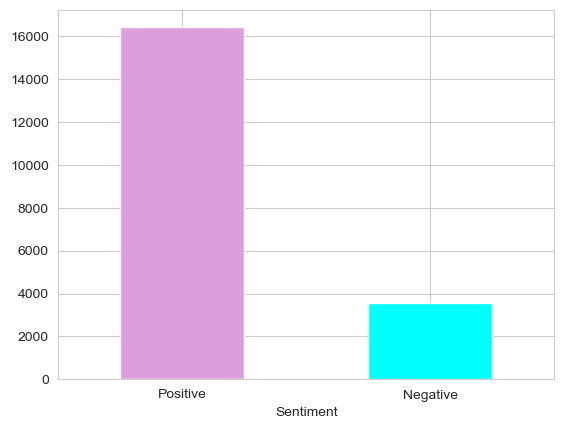

In [19]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [20]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3579,3579,3579
Positive,16421,16421,16421


In [21]:
df4.groupby("polarity").max().head(5)
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,tokens,Sentiment
polarity,,,
-1.000000,what's the worst accident a child has ever has...,"[what, the, fuck, usc]",Negative
-1.000000,@thebotanophile @jasonmillerindc @realdonaldtr...,"[thebotanophile, jasonmillerindc, realdonaldtr...",Negative
-0.976563,@the_newright everyone knows false news fromtn...,"[the_newright, everyone, knows, false, news, f...",Negative
-0.976562,so bored. need something to do...!!!,"[so, bored, nothing, to, do]",Negative
-0.953674,if you really wan to be informed watch @cbsthi...,"[if, you, really, wan, to, be, informed, watch...",Negative


C:\Users\racha\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Polarity Distribution')

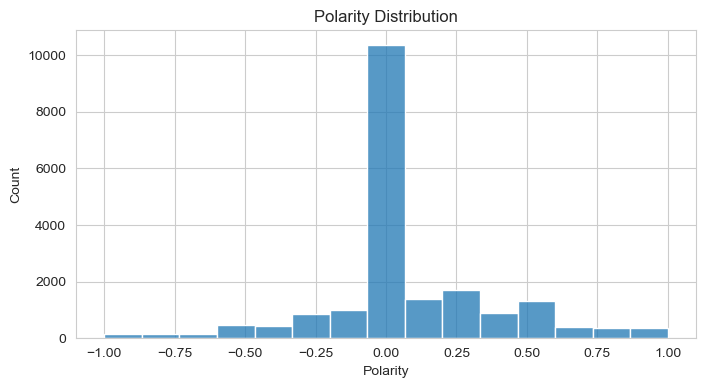

In [22]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')


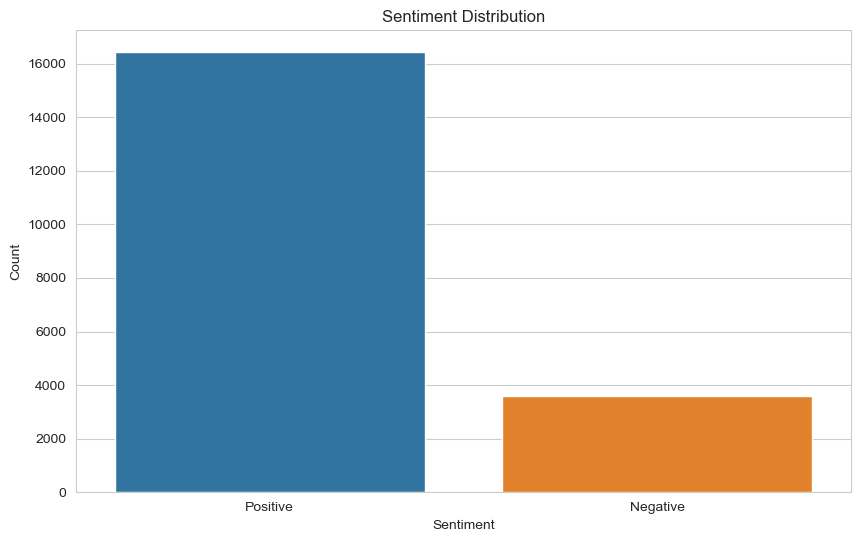

In [23]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [26]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [29]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.836


In [31]:
# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 83.6 %


In [32]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.69      0.14      0.24       713
    Positive       0.84      0.99      0.91      3287

    accuracy                           0.84      4000
   macro avg       0.77      0.56      0.57      4000
weighted avg       0.82      0.84      0.79      4000



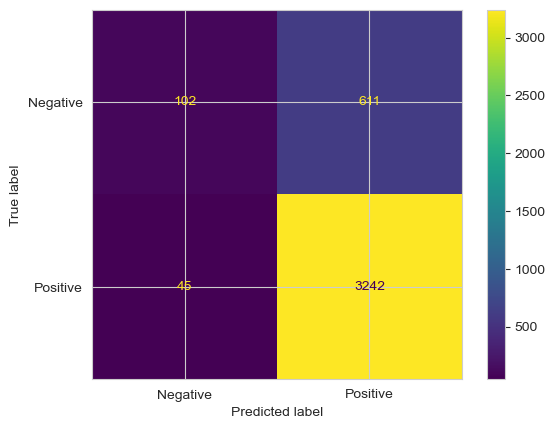

In [34]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()